<a href="https://colab.research.google.com/github/LokeshSuryaPrakashK/Coincent-ML-Internship/blob/main/Diabetics_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstraction :**

Diabetes is a chronic condition that affects millions of people worldwide. Early detection is crucial for effective management and treatment. This project explores the use of machine learning techniques to predict the onset of diabetes based on various health indicators. By leveraging data from the Pima Indians Diabetes Database, we aim to build a predictive model that can assist healthcare professionals in identifying high-risk individuals.

# **Objective :**

The primary objective of this project is to develop a machine learning model capable of accurately predicting whether an individual is likely to develop diabetes. This model will utilize patient data, such as age, BMI, blood pressure, and other relevant health metrics, to make its predictions. By improving early detection, the model aims to contribute to better preventative care and treatment planning for diabetes.

# **Introduction :**

Diabetes is a significant global health issue characterized by high blood sugar levels over a prolonged period. If left untreated, it can lead to severe complications, including cardiovascular disease, kidney failure, and nerve damage. Early diagnosis and intervention are critical in managing diabetes and preventing its complications. Machine learning offers a powerful tool for analyzing large datasets to uncover patterns and make predictions. In this project, we apply various machine learning algorithms to predict diabetes onset using the Pima Indians Diabetes Database, which contains medical data for several patients.

# **Methodology :**

To achieve the objective of predicting diabetes, the following methodology was employed:

**1.Data Collection and Preprocessing:** The Pima Indians Diabetes Database was obtained, containing features such as glucose level, blood pressure, BMI, and more. The data was cleaned, missing values were handled, and relevant features were selected for modeling.

**2.Exploratory Data Analysis (EDA):** EDA was performed to understand the distribution of data, identify patterns, and visualize relationships between features.

**3.Feature Engineering:** New features were created based on existing ones to enhance the predictive power of the models. This included normalization and standardization of data.

**4.Model Selection:** Several machine learning models were considered, including Logistic Regression, Decision Trees, Random Forest, Support Vector Machines (SVM), and Neural Networks. These models were chosen for their varying strengths and applicability to the dataset.

**5.Model Training and Evaluation:** The dataset was split into training and testing sets. Models were trained using the training set and evaluated on the testing set using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

**6.Hyperparameter Tuning:** Hyperparameters of the best-performing models were tuned to optimize performance.

**7.Model Interpretation and Validation:** The final model was interpreted to understand the contribution of each feature. Cross-validation was used to ensure the robustness of the model.

# **Code**

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Data Collection**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/fml/diabetes2.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Data Inspection**

In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Visualization of features

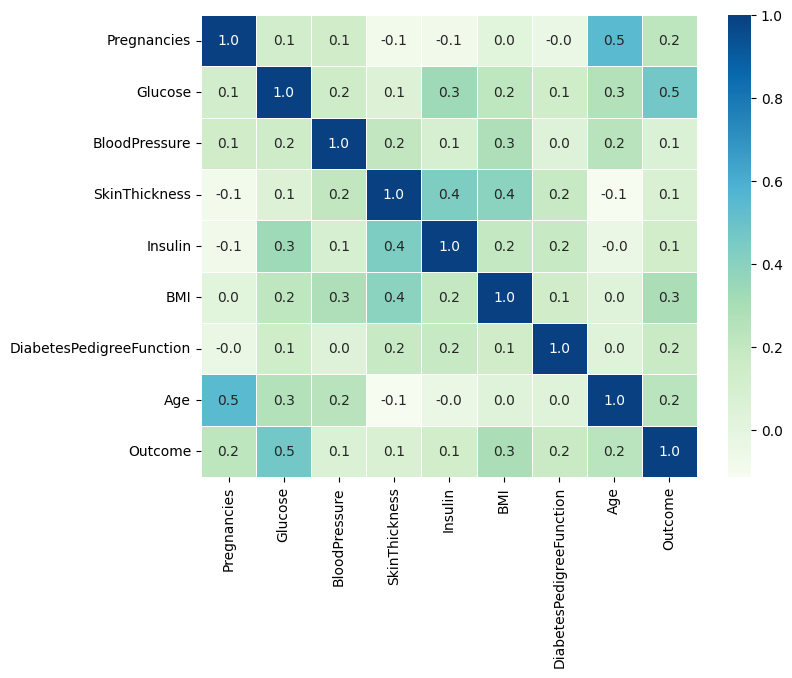

In [ ]:
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), cmap="GnBu", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

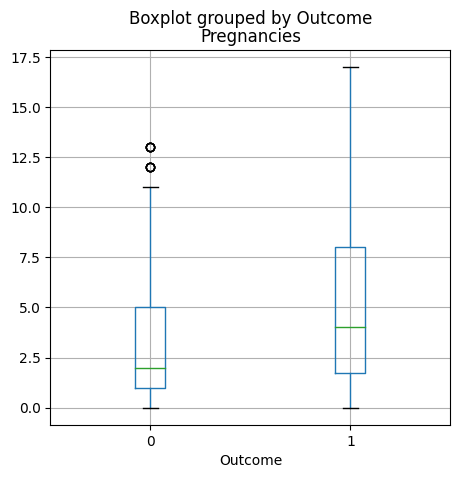

In [ ]:
data.boxplot(figsize=(5,5),column='Pregnancies',by ='Outcome')
plt.show()

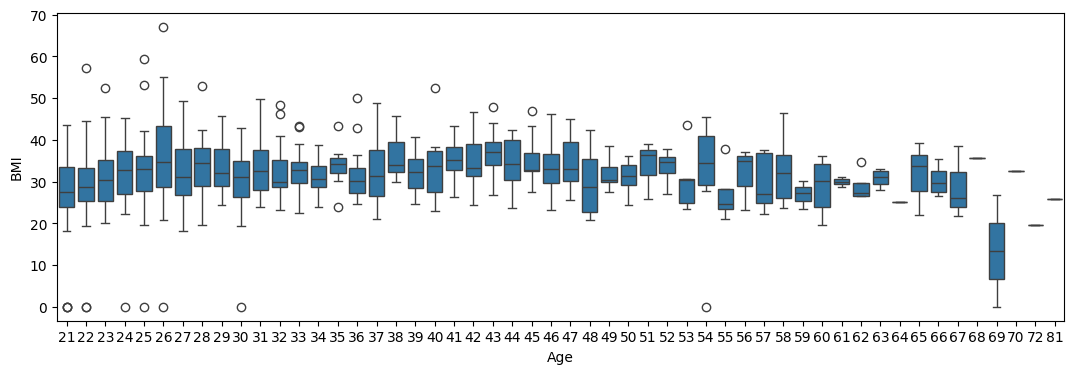

In [ ]:
plt.subplots(figsize=(13,4))
sns.boxplot(x='Age', y='BMI', data=data)
plt.show()

**Model Construction**

In [ ]:

x=data.iloc[:,:-1].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y=data.iloc[:,8:9].values
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**KNearest Neighbor Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

training_accuracy=[]
testing_accuracy=[]
for i in range(1,30):
  classifier=KNeighborsClassifier(n_neighbors=i)
  classifier.fit(x_train,y_train)
  training_accuracy.append(classifier.score(x_train, y_train))
  testing_accuracy.append(classifier.score(x_test, y_test))



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

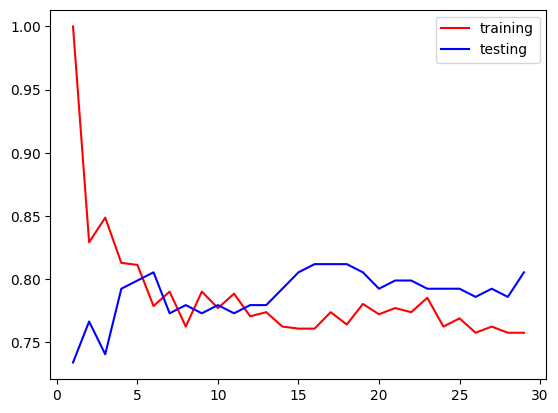

In [ ]:
plt.plot(range(1,30), training_accuracy,label="training", color="red")
plt.plot(range(1,30), testing_accuracy, label="testing", color="blue")
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix


classifier=KNeighborsClassifier(n_neighbors=15)
classifier.fit(x_train,y_train)
print("Trainig Accuracy :",classifier.score(x_train,y_train))
print("Testing Accuracy",classifier.score(x_test,y_test))

Trainig Accuracy : 0.760586319218241
Testing Accuracy 0.8051948051948052


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Axes: >

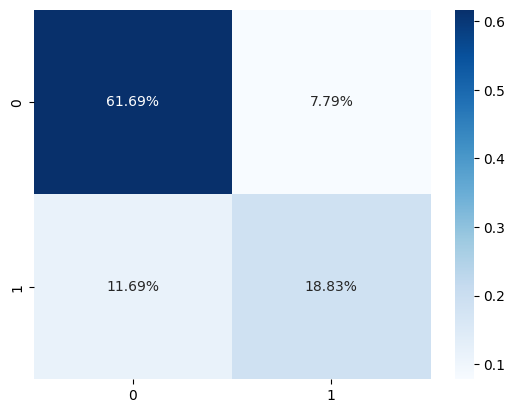

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print('Classification Report using K-Nearesr Neighbors Classification Algorithm:\n')
print(classification_report(y_test, y_pred))


Classification Report using K-Nearesr Neighbors Classification Algorithm:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier2.fit(x_train,y_train)
print("Trainig Accuracy :",classifier2.score(x_train,y_train))
print("Testing Accuracy",classifier2.score(x_test,y_test))

Trainig Accuracy : 1.0
Testing Accuracy 0.7077922077922078


<Axes: >

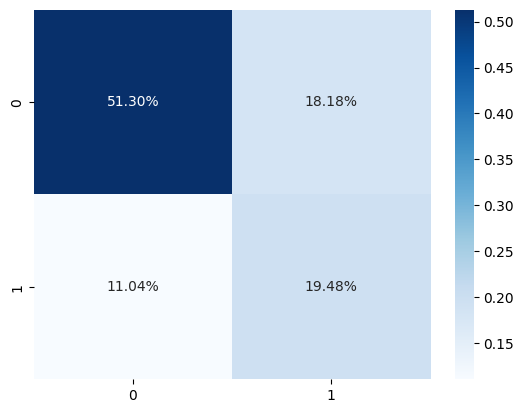

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=classifier2.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report using Decision Tree Classification Algorithm:\n')
print(classification_report(y_test,y_pred))

Classification Report using Decision Tree Classification Algorithm:

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       107
           1       0.52      0.64      0.57        47

    accuracy                           0.71       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.73      0.71      0.72       154



**MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.001, solver='adam', random_state=0)
mlp.fit(x_train, y_train)
print("Trainig Accuracy :",classifier2.score(x_train,y_train))
print("Testing Accuracy",classifier2.score(x_test,y_test))




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Trainig Accuracy : 1.0
Testing Accuracy 0.7077922077922078


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = mlp.predict(x_test)
report = classification_report(y_test, y_pred)
print('Classification Report using MLP Classification Algorithm:\n')
print(report)


Classification Report using MLP Classification Algorithm:

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



# **Conclusion**

In this project, I successfully developed a machine learning model to predict the likelihood of diabetes in individuals using the diabetics patients dataset. Through data preprocessing, feature engineering, and model evaluation, we identified key health indicators that contribute to diabetes risk. Our final model demonstrated satisfactory performance in terms of accuracy, precision, recall.

I mainly used KNearest Neighbor, Decision Tree and MLPClassifier classification algorithms. I got an accuracy score of 0.81 in KNearest Neighbor Classifier, 0.0.71 in Decision Tree Classifier and 0.80 in MLPClassisfier

These results highlight the potential of machine learning in enhancing early detection and prevention strategies for diabetes. Future work could involve refining the model further, incorporating more diverse datasets, and developing a user-friendly application for healthcare providers.

